## Austin Animal Center Data Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#https://data.world/misohungry/austin-animal-shelter-intakes

In [3]:
animal = pd.read_csv('austin-animal-center-intakes-1.csv')

In [4]:
animal.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A748291,*Madison,05/01/2017 02:26:00 PM,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,Black
1,A750529,NaN,05/28/2017 01:22:00 PM,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,White/Cream
2,A730601,NaN,07/07/2016 12:11:00 PM,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby
3,A748238,NaN,05/01/2017 10:53:00 AM,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,White
4,A683644,*Zoey,07/13/2014 11:02:00 AM,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White


In [5]:
animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74788 entries, 0 to 74787
Data columns (total 12 columns):
Animal ID           74788 non-null object
Name                51646 non-null object
DateTime            74788 non-null object
MonthYear           74788 non-null object
Found Location      74788 non-null object
Intake Type         74788 non-null object
Intake Condition    74788 non-null object
Animal Type         74788 non-null object
Sex upon Intake     74787 non-null object
Age upon Intake     74788 non-null object
Breed               74788 non-null object
Color               74788 non-null object
dtypes: object(12)
memory usage: 6.8+ MB


In [6]:
animal.describe()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,74788,51646,74788,74788,74788,74788,74788,74788,74787,74788,74788,74788
unique,67875,14168,52809,52809,34329,5,8,5,5,46,2086,514
top,A706536,Bella,09/23/2016 12:00:00 PM,09/23/2016 12:00:00 PM,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,11,327,64,64,13190,52736,65609,42096,23896,13590,22395,7761


In [7]:
animal_cut2 = animal.sample(1000)
animal_cut2.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
6577,A741267,NaN,12/30/2016 11:27:00 AM,12/30/2016 11:27:00 AM,Peppertree Parkway & Deadwood Drive in Austin ...,Stray,Normal,Dog,Intact Female,1 month,Labrador Retriever Mix,Black/White
61785,A687345,Buster,09/03/2014 04:04:00 PM,09/03/2014 04:04:00 PM,12609 Desau Rd. in Travis (TX),Stray,Normal,Dog,Intact Male,4 months,Whippet Mix,White/Tan
7117,A533243,Choco,02/24/2017 11:52:00 AM,02/24/2017 11:52:00 AM,Riverside Dr And Montopolis Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,8 years,Labrador Retriever/Pit Bull,Chocolate
70161,A733667,*Mike,08/25/2016 01:14:00 PM,08/25/2016 01:14:00 PM,12341 County Line Rd in Manor (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Blue Tabby/White
1042,A726005,Ace,05/04/2016 06:10:00 PM,05/04/2016 06:10:00 PM,11904 N Interstate 35 Frontage Rd in Austin (TX),Stray,Normal,Dog,Neutered Male,3 years,Boston Terrier Mix,Black/White


In [8]:
animal_cut = animal.sample(1000)

In [9]:
animal_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 16683 to 44980
Data columns (total 12 columns):
Animal ID           1000 non-null object
Name                680 non-null object
DateTime            1000 non-null object
MonthYear           1000 non-null object
Found Location      1000 non-null object
Intake Type         1000 non-null object
Intake Condition    1000 non-null object
Animal Type         1000 non-null object
Sex upon Intake     1000 non-null object
Age upon Intake     1000 non-null object
Breed               1000 non-null object
Color               1000 non-null object
dtypes: object(12)
memory usage: 101.6+ KB


In [10]:
count = 0
for index, i in enumerate(animal_cut['Age upon Intake']):
    split_i = i.split(' ')
    if split_i[1] == 'years' or split_i[1] == 'year':
        weeks = int(split_i[0]) * 48
    elif split_i[1] == 'months'or split_i[1] == 'month':
        weeks = int(split_i[0]) * 4
    elif split_i[1] == 'weeks' or split_i[1] == 'week':
        weeks = int(split_i[0])
    elif split_i[1] == 'day' or split_i[1] == 'days':
        weeks = int(split_i[0]) / 4
    else:
        count += 1
    animal_cut['Age upon Intake'].iloc[index] = weeks
animal_basic = animal

In [11]:
animal_cut = animal_cut.drop(['Animal ID', 'Name', 'MonthYear', 'DateTime', 'Found Location'], axis = 1)

In [12]:
animal_cut.head(10)

,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
16683,Stray,Normal,Cat,Intact Male,96,Domestic Shorthair Mix,Black
6018,Owner Surrender,Normal,Cat,Intact Male,4,Domestic Shorthair Mix,Brown Tabby/White
42107,Stray,Normal,Cat,Intact Female,48,Domestic Shorthair Mix,Torbie
64417,Stray,Sick,Cat,Intact Female,4,Domestic Shorthair Mix,Tortie
42793,Stray,Normal,Dog,Neutered Male,480,Chihuahua Shorthair Mix,Tricolor
17801,Owner Surrender,Normal,Cat,Neutered Male,432,Domestic Shorthair Mix,Orange Tabby/White
48757,Stray,Normal,Cat,Intact Male,4,Domestic Shorthair Mix,Blue Tabby
35852,Stray,Injured,Cat,Spayed Female,48,Domestic Shorthair Mix,Brown Tabby
15703,Public Assist,Normal,Dog,Intact Female,48,Pomeranian/Chihuahua Longhair,Black/Brown
56994,Stray,Normal,Cat,Intact Male,4,Domestic Medium Hair Mix,Blue Tabby/White


In [13]:
animal_cut['Animal Type'].value_counts()

Dog      552
Cat      390
Other     55
Bird       3
Name: Animal Type, dtype: int64

In [14]:
Color_count = animal_cut['Color'].value_counts()

In [15]:
Color_list = Color_count[animal_cut['Color'].value_counts() < 5].index

In [16]:
for index, i in enumerate(animal_cut['Color']):
    if i in Color_list:
        animal_cut['Color'].iloc[index] = 'Other'
animal_cut['Color'].value_counts()

Other                  123
Black/White            117
Black                   88
Brown Tabby             56
Brown                   44
White                   36
Tan/White               35
Brown/White             28
Brown Tabby/White       27
Blue                    27
Orange Tabby            25
White/Black             23
Blue/White              22
Black/Brown             22
Tricolor                22
White/Brown             20
Tortie                  20
Black/Tan               19
Blue Tabby              19
Calico                  16
Tan                     15
Torbie                  15
Red                     15
Brown Brindle/White     14
Orange Tabby/White      12
Brown Brindle           12
Brown/Black             12
White/Tan               11
Sable                   11
Red/White               10
Seal Point               9
Chocolate/White          9
Buff                     9
Gray/White               8
White/Blue               6
White/Brown Brindle      6
Tan/Black                6
B

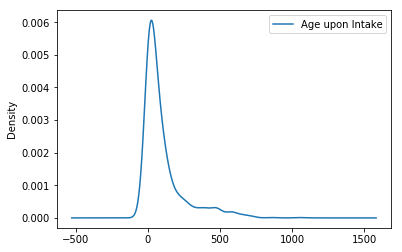

In [17]:
animal_cut.plot(kind = 'kde', x = 'Sex upon Intake')

In [9]:
abandoned = pd.read_csv('abandoned2.txt')

In [10]:
abandoned.head()

,age,careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,happenPlace,...,noticeNo,noticeSdt,officetel,orgNm,popfile,processState,sexCd,specialMark,weight,Unnamed: 22
0,2017(년생),충청남도 공주시 번영1로 54 (신관동),강북동물병원,041-856-9900,가축방역팀,황백색,444450201800190,http://www.animal.go.kr/files/shelter/2018/06/...,20180625,사곡마곡사로 138,...,충남-공주-2018-00189,20180625,041-840-8899,충청남도 공주시,http://www.animal.go.kr/files/shelter/2018/06/...,보호중,F,진드기성 피부염,12(Kg),NaN
1,2014(년생),충청남도 공주시 번영1로 54 (신관동),강북동물병원,041-856-9900,가축방역팀,백색,444450201800189,http://www.animal.go.kr/files/shelter/2018/06/...,20180625,이인면 신영리 와룡길 107,...,충남-공주-2018-00188,20180625,041-840-8899,충청남도 공주시,http://www.animal.go.kr/files/shelter/2018/06/...,보호중,F,알러지성 피부염,4(Kg),NaN
2,2017(년생),충청남도 천안시 동남구 목천읍 학수소사길 132 (목천읍) [입양센터:서북구 천안천...,천안시유기동물보호소,050-5994-9119,김훈아,흰색,444449201800753,http://www.animal.go.kr/files/shelter/2018/06/...,20180625,680 *서북구 부대동 육교부근,...,충남-천안-2018-00726,20180625,041-521-5724,충청남도 천안시,http://www.animal.go.kr/files/shelter/2018/06/...,보호중,F,(680),4(Kg),NaN
3,2018(년생),강원도 철원군 동송읍 이평리 11리 성일동물병원,성일동물병원,033-455-8943,김태건,검 갈,442430201800084,http://www.animal.go.kr/files/shelter/2018/06/...,20180625,동송열쇠 인근,...,강원-철원-2018-00079,20180625,033-450-5394,강원도 철원군,http://www.animal.go.kr/files/shelter/2018/06/...,종료(반환),M,귀 염증,3.00(Kg),NaN
4,2015(년생),강원도 철원군 동송읍 이평리 11리 성일동물병원,성일동물병원,033-455-8943,김태건,흰,442430201800083,http://www.animal.go.kr/files/shelter/2018/06/...,20180625,동송읍 학마을캠프 인근,...,강원-철원-2018-00078,20180625,033-450-5394,강원도 철원군,http://www.animal.go.kr/files/shelter/2018/06/...,종료(반환),M,경찰/119 출동하여 구조(포획),50.00(Kg),NaN


In [14]:
if '경찰' in '경찰/119 출동하여 구조(포획)':
    check = True
else:
    check = False
    
print(check)

True


In [11]:
abandoned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
age             999 non-null object
careAddr        999 non-null object
careNm          999 non-null object
careTel         999 non-null object
chargeNm        999 non-null object
colorCd         999 non-null object
desertionNo     999 non-null object
filename        999 non-null object
happenDt        999 non-null object
happenPlace     999 non-null object
kindCd          999 non-null object
neuterYn        999 non-null object
noticeEdt       999 non-null object
noticeNo        999 non-null object
noticeSdt       999 non-null object
officetel       999 non-null object
orgNm           999 non-null object
popfile         999 non-null object
processState    999 non-null object
sexCd           999 non-null object
specialMark     921 non-null object
weight          900 non-null object
Unnamed: 22     0 non-null float64
dtypes: float64(1), object(22)
memory usage: 179.6+ KB


In [12]:
abandoned['processState'].value_counts()

보호중                                        263
종료(입양)                                     192
종료(반환)                                     183
종료(안락사)                                    164
종료(자연사)                                     87
M                                           12
종료(기증)                                      10
F                                            9
(개체관리번호 3234) 생후11개월/ 사나움                    1
(개체관리번호 3190) 생후8개월                          1
(개체관리번호 3241) 생후10개월/ 경계심 강함                 1
(개체관리번호 3236)                                1
종료(방사)                                       1
(개체관리번호 3194) 생후4개월/파랑목줄/빨강몸줄 착용             1
(개체관리번호 3220) 생후1개월/ 보더콜리 믹스                 1
(개체관리번호 3204) 빨강목줄 착용/ 경계심 강함                1
(개체관리번호 3243) 빨강목줄 착용                        1
(개체관리번호 3197) 생후3개월                          1
(개체관리번호 3260) 생후2개월                          1
(개체관리번호 3224) 생후3개월                          1
(개체관리번호 3192) 파랑목줄 착용/ 경계심 강함                1
(개체관리번호 3198)